# HoxB8 Analysis Notebook

In [1]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Import peakplot package
import peakplot

## Data File Lists and Birth Times

In [2]:
hoxb_file = ['hoxb8_data/hoxb1.h5',
             'hoxb8_data/hoxb2.h5',
             'hoxb8_data/hoxb3.h5',
             'hoxb8_data/hoxb4.h5',
             'hoxb8_data/hoxb5.h5',
             'hoxb8_data/hoxb6.h5',
             'hoxb8_data/hoxb7.h5',
             'hoxb8_data/hoxb8.h5',
             'hoxb8_data/hoxb9.h5']

ctrl_file = ['hoxb8_data/ctrl1.h5',
             'hoxb8_data/ctrl2.h5',
             'hoxb8_data/ctrl3.h5',
             'hoxb8_data/ctrl4.h5',
             'hoxb8_data/ctrl5.h5',
             'hoxb8_data/ctrl6.h5',
             'hoxb8_data/ctrl7.h5',
             'hoxb8_data/ctrl8.h5',
             'hoxb8_data/ctrl9.h5']

In [3]:
# Birth times (Gestational days are expressed as GD 18 = 1/18, etc)
hoxb_birth = [['1/19 7:37', '1/19 10:51'],
             ['1/19 9:14'],
             ['1/19 14:25', '1/19 14:47', '1/19 16:28', '1/19 17:03'],
             ['1/19 13:35', '1/19 14:06', '1/19 14:33', '1/19 14:38', '1/19 15:33', '1/19 17:52', '1/19 18:33'],
             ['1/19 12:33', '1/19 15:42'],
             ['1/19 0:20', '1/19 0:44', '1/19 5:02', '1/19 5:18', '1/19 5:25', '1/19 5:32', '1/19 19:08'],
             ['1/19 18:33', '1/19 21:53', '1/19 22:01', '1/19 22:18', '1/19 23:20', '1/20 1:54', '1/20 4:35', '1/20 6:29'],
             ['1/19 8:57', '1/19 9:05', '1/19 9:42', '1/19 9:45', '1/19 10:13', '1/19 10:20', '1/19 12:30'],
             ['1/19 1:43']]

ctrl_birth = [['1/19 2:39', '1/19 2:53', '1/19 3:03', '1/19 3:22'],
              ['1/19 6:41', '1/19 7:26', '1/19 7:34', '1/19 7:48'],
              ['1/18 22:32', '1/18 22:46', '1/18 22:55', '1/18 23:19', '1/18 23:32', '1/18 23:36'],
              ['1/19 7:11', '1/19 7:25', '1/19 7:40', '1/19 8:22', '1/19 8:34', '1/19 8:39', '1/19 8:42'],
              ['1/19 4:56', '1/19 5:26', '1/19 5:35', '1/19 5:43', '1/19 5:57', '1/19 6:03', '1/19 6:14', '1/19 6:36'],
              ['1/19 0:05', '1/19 0:11', '1/19 0:18', '1/19 0:20', '1/19 0:25', '1/19 0:30', '1/19 0:44', '1/19 0:51'],
              ['1/18 22:19', '1/18 22:27', '1/18 22:29', '1/18 22:33', '1/18 22:43', '1/18 22:48', '1/18 22:58'],
              ['1/18 23:12', '1/18 23:25', '1/18 23:35', '1/18 23:42', '1/18 23:53', '1/19 0:07', '1/19 0:11', '1/19 1:24'],
              ['1/19 2:26', '1/19 2:35', '1/19 2:42', '1/19 2:56', '1/19 3:15', '1/19 3:27', '1/19 3:33', '1/19 3:37']]

## Main Analysis: Peak Detection During Labor (0-2h)

In [4]:
# Generate data matrices for labor period
sample_interval = '1s'
time_range = [0, 7200]  # 0-2 hours

hoxb_mat = peakplot.get_plot_mat(hoxb_file, time_range=time_range, 
                                interval=sample_interval, resample_method='mean')
ctrl_mat = peakplot.get_plot_mat(ctrl_file, time_range=time_range, 
                                interval=sample_interval, resample_method='mean')

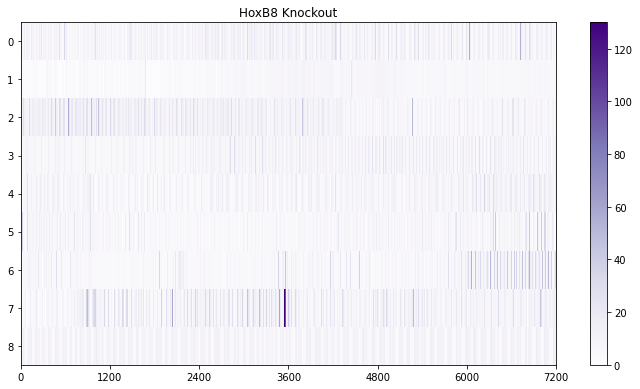

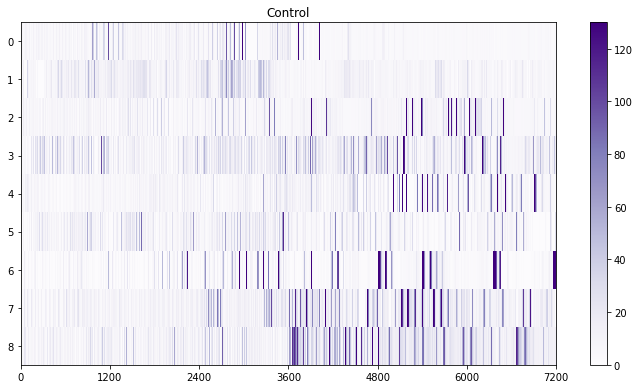

In [5]:
# Visualize pressure matrices
# HoxB8 matrix
hoxb_plot = np.copy(hoxb_mat)
hoxb_plot[hoxb_plot < 0] = 0
hoxb_plot[np.isnan(hoxb_plot)] = 0

plt.figure(figsize=(12, 6.3))
plt.imshow(hoxb_plot, cmap='Purples', vmin=0, vmax=130, aspect='auto', interpolation='nearest')
plt.xticks(1200 * np.arange(7))
plt.colorbar()
plt.title('HoxB8 Knockout')
plt.savefig('hoxb_mat2.pdf', dpi=300)
plt.show()

# Control matrix
ctrl_plot = np.copy(ctrl_mat)
ctrl_plot[np.isnan(ctrl_plot)] = 0
ctrl_plot[ctrl_plot < 0] = 0

plt.figure(figsize=(12, 6.3))
plt.imshow(ctrl_plot, cmap='Purples', vmin=0, vmax=130, aspect='auto', interpolation='nearest')
plt.xticks(1200 * np.arange(7))
plt.colorbar()
plt.title('Control')
plt.savefig('ctrl_mat2.pdf', dpi=300)
plt.show()

In [6]:
# Extract peak statistics with optimal parameters
p = 20
h = 40
num_peaks = None
data = [hoxb_mat, ctrl_mat]
labels = ['hoxb8', 'ctrl']
xticks, peak_values, mean_values = peakplot.get_stat_data(data, labels, p, h, num_peaks)

# Calculate median values
median_values = {}
for idx, peaks in enumerate(peak_values):
    if xticks[idx] in median_values:
        median_values[xticks[idx]].append(np.median(peaks))
    else:
        median_values[xticks[idx]] = [np.median(peaks)]

# Export results
peakplot.list2csv(median_values.values(), 'hoxb_peak_median.csv')
peakplot.list2csv(mean_values, 'hoxb_peak_mean.csv')
peakplot.list2csv(peak_values, 'hoxb_all_peaks.csv')

## Birth Timing Visualization

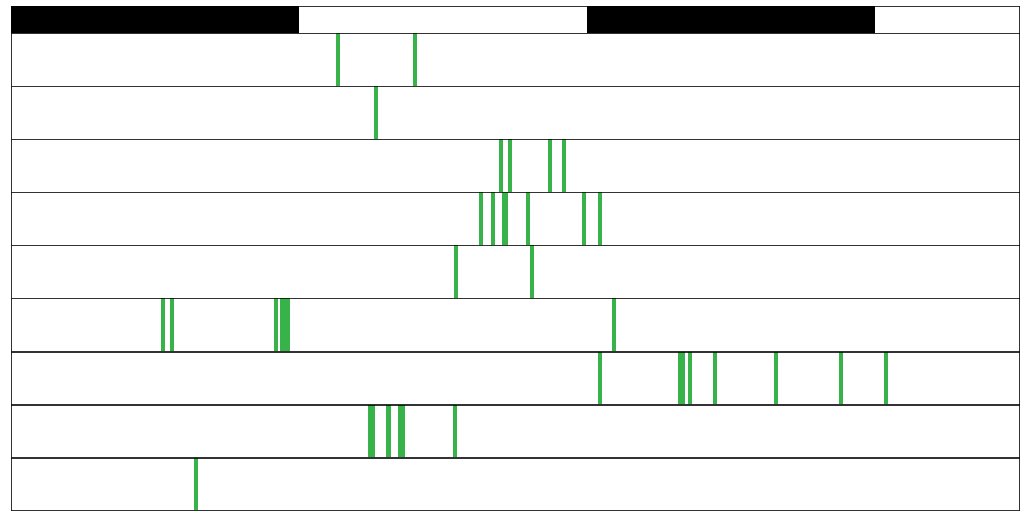

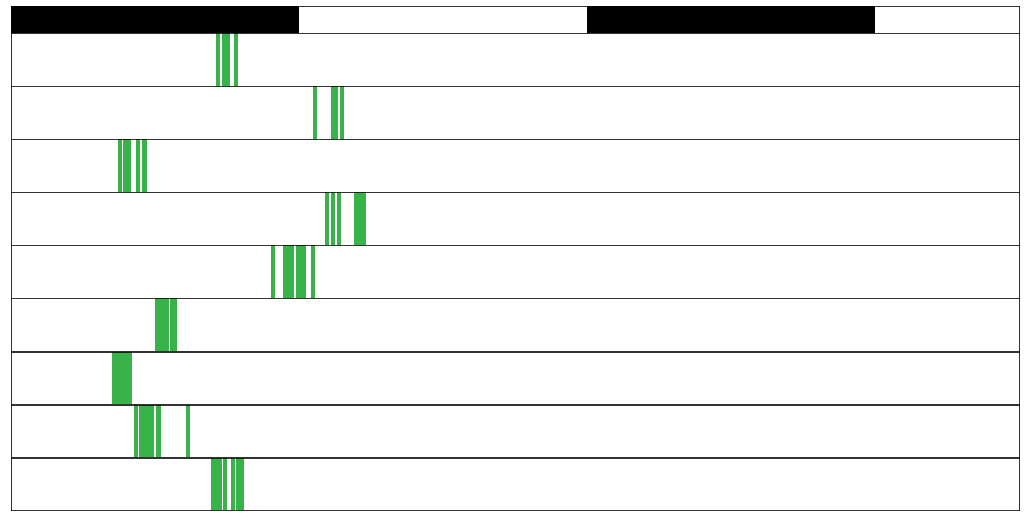

In [7]:
# Plot birth timing patterns
peakplot.plot_birthtimes(hoxb_birth, 'hoxb_birthtime.pdf', birth_color='#37b34a')
peakplot.plot_birthtimes(ctrl_birth, 'ctrl_birthtime.pdf', birth_color='#37b34a')

## Sample Trace Plots

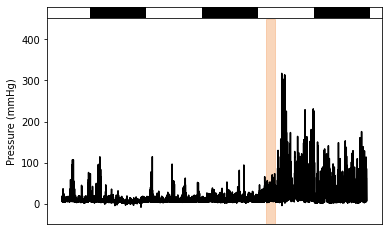

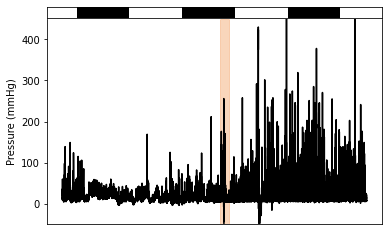

In [8]:
# Create individual trace plots
peakplot.make_trace_plot(hoxb_file[0], hoxb_birth[0], 'hoxb_sample_trace.png', birth_color='#37b34a00')
peakplot.make_trace_plot(ctrl_file[0], ctrl_birth[0], 'ctrl_sample_trace.png', birth_color='#37b34a00')

## Birth Interval Analysis

In [9]:
# Calculate birth intervals using package function
hoxb_interval = peakplot.get_mean_birth_interval(hoxb_birth, 
                                                completed=[False, False, False, True, False, True, True, True, False])
ctrl_interval = peakplot.get_mean_birth_interval(ctrl_birth)

# Export intervals in minutes
peakplot.list2csv([ctrl_interval / 60, hoxb_interval / 60], 'hoxb_birth_interval.csv')

print(f"HoxB8 birth intervals (min): {hoxb_interval / 60}")
print(f"Control birth intervals (min): {ctrl_interval / 60}")

HoxB8 birth intervals (min): [ 851.5        1606.          323.75         49.66666667  703.5
  188.          102.28571429   35.5        2057.        ]
Control birth intervals (min): [14.33333333 22.33333333 12.8        15.16666667 14.28571429  6.57142857
  6.5        18.85714286 10.14285714]


## Pre-labor Analysis (Day before birth)

In [10]:
# Generate data matrices for pre-labor period
day_range = ['1/18 0:00', '1/18 18:00']

hoxb_premat = peakplot.get_plot_mat(hoxb_file, day_range=day_range, birth_time=hoxb_birth,
                                   interval=sample_interval, resample_method='mean')
ctrl_premat = peakplot.get_plot_mat(ctrl_file, day_range=day_range, birth_time=ctrl_birth,
                                   interval=sample_interval, resample_method='mean')

In [11]:
# Extract pre-labor peak statistics
data = [hoxb_premat, ctrl_premat]
xticks, peak_values, mean_values = peakplot.get_stat_data(data, labels, p, h, num_peaks)

median_values = {}
for idx, peaks in enumerate(peak_values):
    if xticks[idx] in median_values:
        median_values[xticks[idx]].append(np.median(peaks))
    else:
        median_values[xticks[idx]] = [np.median(peaks)]

peakplot.list2csv(median_values.values(), 'hoxb_pre_peak_median.csv')
peakplot.list2csv(mean_values, 'hoxb_pre_peak_mean.csv')
peakplot.list2csv(peak_values, 'hoxb_pre_all_peaks.csv')

## Zeitgeber Time Analysis

In [12]:
# Convert birth times to zeitgeber time
zeit_list = [peakplot.birth2zeit(bt) for bt in [ctrl_birth, hoxb_birth]]
peakplot.list2csv(zeit_list, 'hoxb_birth_start.csv')

print(f"Control ZT times: {zeit_list[0]}")
print(f"HoxB8 ZT times: {zeit_list[1]}")

Control ZT times: [-3.35        0.68333333 -7.46666667  1.18333333 -1.06666667 -5.91666667
 -7.68333333 -6.8        -3.56666667]
HoxB8 ZT times: [ 1.61666667  3.23333333  8.41666667  7.58333333  6.55       -5.66666667
 12.55        2.95       -4.28333333]


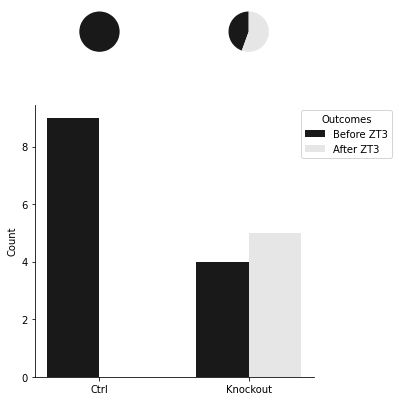

In [13]:
# ZT3 analysis using package function
data = np.zeros([len(zeit_list), 2])
for idx, time in enumerate(zeit_list):
    data[idx, :] = [sum(time < 3), sum(time >= 3)]
    
treatments = ['Ctrl', 'Knockout']
outcomes = ["Before ZT3", "After ZT3"]

peakplot.plot_bar_with_pies(data, output_file='hoxb_zt_plot.pdf',
                           treatment_labels=treatments, outcome_labels=outcomes)

## Post-labor Analysis (2-8h after birth onset)

In [14]:
# Generate post-labor data matrices
time_range = [7200, 3600 * 8]  # 2-8 hours

hoxb_postmat = peakplot.get_plot_mat(hoxb_file, time_range=time_range,
                                    interval=sample_interval, resample_method='mean')
ctrl_postmat = peakplot.get_plot_mat(ctrl_file, time_range=time_range,
                                    interval=sample_interval, resample_method='mean')

# Extract and export post-labor statistics using package function
data = [hoxb_postmat, ctrl_postmat]
xticks, peak_values, mean_values = peakplot.get_stat_data(data, labels, p, h, num_peaks)

median_values = {}
for idx, peaks in enumerate(peak_values):
    if xticks[idx] in median_values:
        median_values[xticks[idx]].append(np.median(peaks))
    else:
        median_values[xticks[idx]] = [np.median(peaks)]

peakplot.list2csv(median_values.values(), 'hoxb_post_peak_median.csv')
peakplot.list2csv(mean_values, 'hoxb_post_peak_mean.csv')
peakplot.list2csv(peak_values, 'hoxb_post_all_peaks.csv')